In [20]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [21]:
dataset = pd.read_excel("https://search.worldbank.org/api/projects/all.csv")

In [22]:
#types of all columns in the dataframe
dataset.columns = dataset.iloc[1]
dataset = dataset[2:]
dataset.dtypes

1
id                          object
regionname                  object
countryname                 object
projectstatusdisplay        object
last_stage_reached_name     object
project_name                object
pdo                         object
impagency                   object
cons_serv_reqd_ind          object
url                         object
boardapprovaldate           object
closingdate                 object
projectfinancialtype        object
curr_project_cost           object
curr_ibrd_commitment        object
curr_ida_commitment         object
curr_total_commitment       object
grantamt                    object
borrower                    object
lendinginstr                object
envassesmentcategorycode    object
esrc_ovrl_risk_rate         object
sector1                     object
sector2                     object
sector3                     object
theme1                      object
theme2                      object
dtype: object

In [23]:
#There are 21487 rows in the dataset

len(dataset)

21543

In [24]:
#trying to find out what values are there in the dataframe, types, formatting
dataset.head()

1,id,regionname,countryname,projectstatusdisplay,last_stage_reached_name,project_name,pdo,impagency,cons_serv_reqd_ind,url,...,grantamt,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2
2,P252350,Eastern and Southern Africa,Republic of Rwanda,Active,Bank Approved,Rwanda Priority Skills for Growth (PSG),The Program Development Objective is to expand...,Ministry Of Education,NaN,http://projects.worldbank.org/P252350/null?lan...,...,0,Ministry of Finance and Economic Planning,Program-for-Results Financing,NaN,NaN,Public Administration - Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,NaN
3,P252338,East Asia and Pacific,Democratic Republic of Timor-Leste,Active,Bank Approved,Road Climate Resilience Project Second Additio...,The project will deliver sustainable climate r...,"Ministry of Public Works, Transport, and Commu...",NaN,http://projects.worldbank.org/P252338/null?lan...,...,0,Ministry of Finance,Investment Project Financing,B,NaN,Rural and Inter-Urban Roads,Public Administration - Transportation,NaN,NaN,NaN
4,P252337,Eastern and Southern Africa,Republic of Kenya,Dropped,Concept Review,Kenya Devolution and Service Delivery,To improve citizen and government access to co...,Kenya National Bureau of Statistics,NaN,http://projects.worldbank.org/P252337/null?lan...,...,340000,Kenya National Bureau of Statistics,Investment Project Financing,C,NaN,NaN,NaN,NaN,"Public expenditure, financial management and p...",Decentralization
5,P179254,Western and Central Africa,Republic of Cameroon,Pipeline,NaN,Cameroon Health System Strengthening Project,To increase utilization and quality of reprodu...,NaN,NaN,http://projects.worldbank.org/P179254/null?lan...,...,0,NaN,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,P179238,Western and Central Africa,Republic of Chad,Pipeline,NaN,Chad Agribusiness and Rural Transformation Pro...,"The project Development Objective (PDO) is ""to...",NaN,NaN,http://projects.worldbank.org/P179238/null?lan...,...,0,NaN,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
dataset.describe()

1,id,regionname,countryname,projectstatusdisplay,last_stage_reached_name,project_name,pdo,impagency,cons_serv_reqd_ind,url,...,grantamt,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2
count,21543,21540,21540,21538,15197,21541,11579,6650,1483,21541,...,21541,6413,21293,13082,1275,19627,11176,7565,12255,9895
unique,21543,11,207,4,5,18605,9861,4625,3,21541,...,969,2187,18,8,4,159,102,90,73,73
top,P252350,Latin America and Caribbean,Republic of India,Closed,Bank Approved,Education Project (02),Project Development Objective (Note: will be d...,Ministry of Finance,Y,http://projects.worldbank.org/P252350/null?lan...,...,0,Ministry of Finance,Specific Investment Loan,B,Substantial,Central Government (Central Agencies),Central Government (Central Agencies),Central Government (Central Agencies),Rural services and infrastructure,Rural services and infrastructure
freq,1,3766,918,15783,13495,70,47,227,912,1,...,17626,653,8021,5862,542,1814,1633,760,913,714


In [26]:
#so we have Active, Closed, Pipeline and Dropped types, along with NaN
dataset.projectstatusdisplay.unique()


array(['Active', 'Dropped', 'Pipeline', nan, 'Closed'], dtype=object)

In [27]:
dataset.regionname.unique()

array(['Eastern and Southern Africa', 'East Asia and Pacific',
       'Western and Central Africa', 'South Asia',
       'Europe and Central Asia', 'Latin America and Caribbean',
       'Middle East and North Africa', 'Other', 'Africa', 'Africa West',
       nan, 'Africa East'], dtype=object)

In [28]:
#finding out NaN values for project status display: there are only three, so we may exclude them.
dataset[dataset['projectstatusdisplay'].isna()]

1,id,regionname,countryname,projectstatusdisplay,last_stage_reached_name,project_name,pdo,impagency,cons_serv_reqd_ind,url,...,grantamt,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2
516,P177244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1594,P173026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4017,P156335,East Asia and Pacific,Pacific Islands,NaN,Bank Approved,PACIFIC RESILIENCE PROGRAM,The objective of the Program is to strengthen ...,NaN,NaN,http://projects.worldbank.org/P156335/null?lan...,...,900000,NaN,Investment Project Financing,B,NaN,"Other Water Supply, Sanitation and Waste Manag...",Public Administration - Financial Sector,Other Transportation,Natural disaster management,Climate change
6983,P121213,Western and Central Africa,Republic of Liberia,NaN,Begin Appraisal,DROPPED - LR: Road Asset Management Project - ...,The objective is to improve transport efficien...,NaN,NaN,http://projects.worldbank.org/P121213/liberia-...,...,113000000,NaN,Specific Investment Loan,B,NaN,Rural and Inter-Urban Roads,NaN,NaN,Infrastructure services for private sector dev...,NaN
7888,P114115,Western and Central Africa,Republic of Guinea-Bissau,NaN,Begin Appraisal,Education for All - Fast Track Initiative Program,The Project Development Objective is to improv...,NaN,NaN,http://projects.worldbank.org/P114115/educatio...,...,12000000,NaN,Specific Investment Loan,B,NaN,Primary Education,Secondary Education,NaN,Education for all,NaN


In [29]:
dataset[dataset['curr_project_cost'].isna()]['curr_project_cost'] = -dataset['curr_project_cost'].max()

C:\Users\krish\AppData\Local\Temp\ipykernel_20764\155088899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset['curr_project_cost'].isna()]['curr_project_cost'] = -dataset['curr_project_cost'].max()


In [30]:
#removing rows from the dataset where projectstatusdisplay is nan
dataset = dataset[dataset['projectstatusdisplay'].notna()]

In [31]:
#now, encoding pipeline, closed and active as 1, dropped as 0
#Assuming that closed project means that the projects have been completed...

dataset['projectstatus'] = dataset.apply(lambda row: 0 if row.projectstatusdisplay == 'Closed' or row.projectstatusdisplay == 'Dropped' else 1, axis = 1)

C:\Users\krish\AppData\Local\Temp\ipykernel_20764\3293237655.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['projectstatus'] = dataset.apply(lambda row: 0 if row.projectstatusdisplay == 'Closed' or row.projectstatusdisplay == 'Dropped' else 1, axis = 1)


In [32]:
#encoding the categorical variables
label_encoder = preprocessing.LabelEncoder()
dataset['regioncode'] = label_encoder.fit_transform(dataset.regionname)
dataset['countrycode'] = label_encoder.fit_transform(dataset['countryname'])
dataset['countrycode'] = label_encoder.fit_transform(dataset['countryname'])
dataset['financecode'] = label_encoder.fit_transform(dataset['projectfinancialtype'])
dataset['borrowercode'] = label_encoder.fit_transform(dataset['borrower'])
dataset['lendinginstrcode'] = label_encoder.fit_transform(dataset['lendinginstr'])
dataset['envassesmentcategorycode'] = label_encoder.fit_transform(dataset['envassesmentcategorycode'])
dataset['esrc_ovrl_risk_rate'] = label_encoder.fit_transform(dataset['esrc_ovrl_risk_rate'])
dataset['sector1'] = label_encoder.fit_transform(dataset['sector1'])
dataset['sector2'] = label_encoder.fit_transform(dataset['sector2'])
dataset['sector3'] = label_encoder.fit_transform(dataset['sector3'])
dataset['theme1'] = label_encoder.fit_transform(dataset['theme1'])
dataset['theme2'] = label_encoder.fit_transform(dataset['theme2'])

In [33]:
# print(dataset.head())
print(dataset.envassesmentcategorycode.unique(),
dataset.esrc_ovrl_risk_rate.unique(),
dataset.sector1.unique(),
dataset.sector2.unique(),
dataset.sector3.unique(),
dataset.theme1.unique(),
dataset.theme2.unique()
,sep = '\n\n')

[8 1 2 0 5 6 4 7 3]

[4 2 3 0 1]

[127 144 159  93 116 149 130  94  83 158  85 148 139  80 133 110  81 117
  76 107 151 113 118 101 146 141 111  87  77 135 112 134 157 109 154  82
 145  99 128 126 152 100  91 131 136  98 129 140 115 103 156 125 104 122
  86  95 102 138 132  89 114 153 137 108  75 106 143 142  78 124 105 147
  28  20 123  10  69  54  11  25  16  43  41  26  19  33  44  40  74  73
  48  66  35  29  50  42   3  70  61  14  36  21  72  12   1  39  52  59
   9  27  55  58  60  49  34  15  45   0  71  18  46  13  68  63   7  57
  64  23  67 155  22  30  38 119  56  31   2  47  32  62  24   5  17   6
  51  79 150  37   4  90  84   8  53 120  92  97  88  96 121  65]

[ 94  76 102  24  36  91  35  72  69  92  58  20  67  88  19  52  75  50
  26  73  49  59  43  77  70  37  57  86  87  41  31  45  53  55  97  30
  82  44  71  40 101  68  95  54  60  42  29  56  79 100  74  33  99  23
  96  25  28  89  51  81  64  46  18  78  83  80  90  48  66  84  85  32
  21  47  65   1  11   

In [34]:
dataset.isna().any()

1
id                          False
regionname                   True
countryname                  True
projectstatusdisplay        False
last_stage_reached_name      True
project_name                False
pdo                          True
impagency                    True
cons_serv_reqd_ind           True
url                         False
boardapprovaldate            True
closingdate                  True
projectfinancialtype         True
curr_project_cost            True
curr_ibrd_commitment        False
curr_ida_commitment         False
curr_total_commitment       False
grantamt                    False
borrower                     True
lendinginstr                 True
envassesmentcategorycode    False
esrc_ovrl_risk_rate         False
sector1                     False
sector2                     False
sector3                     False
theme1                      False
theme2                      False
projectstatus               False
regioncode                  False
countrycode 

In [35]:
dataset.dtypes

1
id                          object
regionname                  object
countryname                 object
projectstatusdisplay        object
last_stage_reached_name     object
project_name                object
pdo                         object
impagency                   object
cons_serv_reqd_ind          object
url                         object
boardapprovaldate           object
closingdate                 object
projectfinancialtype        object
curr_project_cost           object
curr_ibrd_commitment        object
curr_ida_commitment         object
curr_total_commitment       object
grantamt                    object
borrower                    object
lendinginstr                object
envassesmentcategorycode     int32
esrc_ovrl_risk_rate          int32
sector1                      int32
sector2                      int32
sector3                      int32
theme1                       int32
theme2                       int32
projectstatus                int64
regioncode        

In [36]:
#taking transformed and relevant columns, rejecting others
req_cols = ['project_name', 'pdo', 'impagency', 'curr_project_cost', 'curr_ibrd_commitment', 'curr_ida_commitment', 'curr_total_commitment', 'grantamt', 'envassesmentcategorycode', 'esrc_ovrl_risk_rate', 'sector1', 'sector2', 'sector3', 'theme1', 'theme2', 'regioncode', 'countrycode', 'financecode', 'borrowercode', 'lendinginstrcode', 'projectstatus']
dataset = pd.DataFrame(dataset, columns = req_cols)

In [37]:
dataset.isna().any()

project_name                False
pdo                          True
impagency                    True
curr_project_cost            True
curr_ibrd_commitment        False
curr_ida_commitment         False
curr_total_commitment       False
grantamt                    False
envassesmentcategorycode    False
esrc_ovrl_risk_rate         False
sector1                     False
sector2                     False
sector3                     False
theme1                      False
theme2                      False
regioncode                  False
countrycode                 False
financecode                 False
borrowercode                False
lendinginstrcode            False
projectstatus               False
dtype: bool

In [38]:
#since there still exist na values, fill them with empty strings (textual data)
dataset = dataset.fillna('')
dataset.isna().any()

project_name                False
pdo                         False
impagency                   False
curr_project_cost           False
curr_ibrd_commitment        False
curr_ida_commitment         False
curr_total_commitment       False
grantamt                    False
envassesmentcategorycode    False
esrc_ovrl_risk_rate         False
sector1                     False
sector2                     False
sector3                     False
theme1                      False
theme2                      False
regioncode                  False
countrycode                 False
financecode                 False
borrowercode                False
lendinginstrcode            False
projectstatus               False
dtype: bool

In [39]:
dataset.projectstatus.value_counts()

0    17508
1     4030
Name: projectstatus, dtype: int64

In [40]:
dataset = dataset.iloc[:, 4:]

In [41]:
#visualisation
g = sns.PairGrid(dataset.iloc[:, 4:])
g.map(sns.scatterplot)

In [ ]:
train, test = train_test_split(dataset, test_size = 0.15, shuffle = True, random_state = 534)    #seed for reproducible results
train, val = train_test_split(train, test_size = 0.2, shuffle = True, random_state = 534)

In [ ]:
#normalisation only normalise indices 4, 5, 6 and 7
scaler = preprocessing.MinMaxScaler()
train.iloc[:, : 4] = scaler.fit_transform(train.iloc[:, : 4])
test.iloc[:, : 4] = scaler.transform(test.iloc[:, : 4])
val.iloc[:, : 4] = scaler.transform(val.iloc[:, : 4])

In [ ]:
shape = np.shape(train)
print(shape)

(14608, 17)


In [ ]:
#trying out logistic regression
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy', 'mse']
)

In [ ]:
history = model.fit(x = train.iloc[:, :-1],
        y = train.iloc[:, -1],
        batch_size = 256, 
        epochs = 100,
        validation_data = [val.iloc[:, :-1], val.iloc[:, -1]],
        validation_batch_size = 128)

Epoch 1/100
58/58 [==============================] - 1s 5ms/step - loss: 602.3312 - accuracy: 0.1908 - mse: 0.8090 - val_loss: 546.7292 - val_accuracy: 0.1872 - val_mse: 0.8123
Epoch 2/100
58/58 [==============================] - 0s 3ms/step - loss: 483.2015 - accuracy: 0.1899 - mse: 0.8097 - val_loss: 426.6354 - val_accuracy: 0.1859 - val_mse: 0.8135
Epoch 3/100
58/58 [==============================] - 0s 3ms/step - loss: 364.7656 - accuracy: 0.1924 - mse: 0.8072 - val_loss: 307.9058 - val_accuracy: 0.1870 - val_mse: 0.8122
Epoch 4/100
58/58 [==============================] - 0s 3ms/step - loss: 249.6862 - accuracy: 0.1887 - mse: 0.8108 - val_loss: 193.6738 - val_accuracy: 0.1771 - val_mse: 0.8216
Epoch 5/100
58/58 [==============================] - 0s 3ms/step - loss: 141.3942 - accuracy: 0.1893 - mse: 0.8098 - val_loss: 90.0872 - val_accuracy: 0.1733 - val_mse: 0.8249
Epoch 6/100
58/58 [==============================] - 0s 3ms/step - loss: 55.7256 - accuracy: 0.2848 - mse: 0.7110 - 

In [ ]:
model.evaluate(x = test.iloc[:, :-1], y = test.iloc[:, -1])

101/101 [==============================] - 0s 2ms/step - loss: 0.2843 - accuracy: 0.8849 - mse: 0.0862


[0.2843382656574249, 0.8848898410797119, 0.08619894832372665]

In [ ]:
def history_plotter(history):
    '''Plots training information over epochs
    Arguments: 1) history: history data obtained after training
    Returns: None
    '''
    epochs = len(history.epoch)
    epoch_range = range(epochs)
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize = (16, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epoch_range, train_acc, label = 'Training Accuracy')
    plt.plot(epoch_range, val_acc, label = "Validation Accuracy")
    plt.legend(loc = "lower right")

    plt.subplot(1, 2, 2)
    plt.plot(epoch_range, train_loss, label = "Training Loss")
    plt.plot(epoch_range, val_loss, label = "Validation Loss")
    plt.legend(loc = "lower right")
    plt.show()



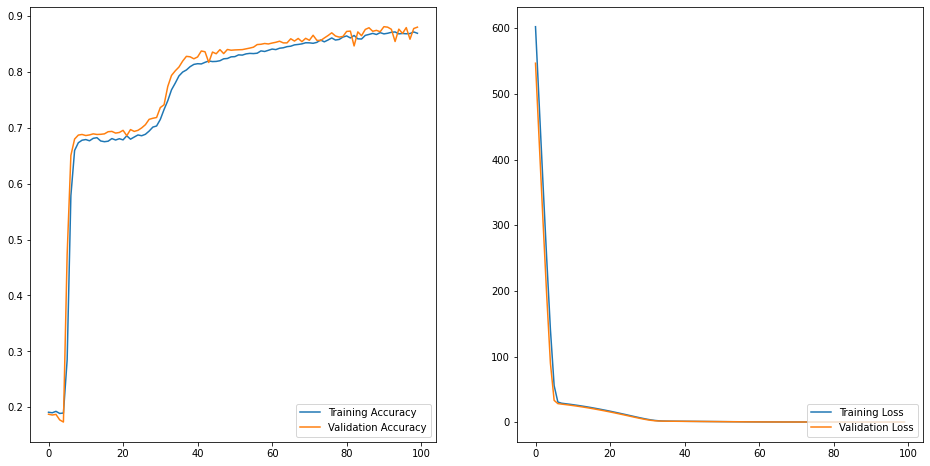

In [ ]:
history_plotter(history)

We notice that the accuracy for logreg is ~86%
Now, trying out a DNN

Epoch 1/100
58/58 [==============================] - 5s 10ms/step - loss: 0.4379 - accuracy: 0.8132 - mse: 0.1377 - val_loss: 0.3402 - val_accuracy: 0.8648 - val_mse: 0.1043
Epoch 2/100
58/58 [==============================] - 0s 6ms/step - loss: 0.3250 - accuracy: 0.8644 - mse: 0.1000 - val_loss: 0.3047 - val_accuracy: 0.8663 - val_mse: 0.0943
Epoch 3/100
58/58 [==============================] - 0s 6ms/step - loss: 0.2968 - accuracy: 0.8777 - mse: 0.0908 - val_loss: 0.3073 - val_accuracy: 0.8790 - val_mse: 0.0934
Epoch 4/100
58/58 [==============================] - 0s 6ms/step - loss: 0.2850 - accuracy: 0.8821 - mse: 0.0871 - val_loss: 0.2721 - val_accuracy: 0.8884 - val_mse: 0.0833
Epoch 5/100
58/58 [==============================] - 0s 6ms/step - loss: 0.2752 - accuracy: 0.8890 - mse: 0.0835 - val_loss: 0.2647 - val_accuracy: 0.8927 - val_mse: 0.0799
Epoch 6/100
58/58 [==============================] - 0s 6ms/step - loss: 0.2694 - accuracy: 0.8906 - mse: 0.0818 - val_loss: 0.2579 - 

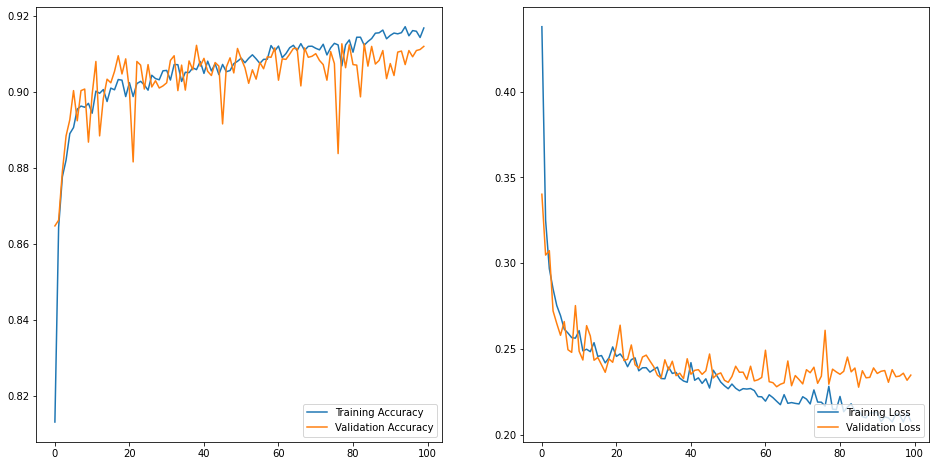

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(32, 2, input_shape = (16, 1), activation = 'tanh', padding = 'same'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(64, 3, activation = 'relu'),
    tf.keras.layers.MaxPooling1D(3),

    tf.keras.layers.Dense(128, activation = 'tanh'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy', 'mse'])

history = model.fit(x = train.iloc[:, :-1],
        y = train.iloc[:, -1],
        batch_size = 256, 
        epochs = 100,
        validation_data = [val.iloc[:, :-1], val.iloc[:, -1]],
        validation_batch_size = 128)

history_plotter(history)

Accuracy touches 92% for the training set using a DNN, but there are signs of overfitting.